In [438]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import mpl_toolkits.mplot3d.axes3d as p3
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import metrics, mixture, cluster, datasets
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice
import time
from math import ceil

In [439]:
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(context='notebook', palette='viridis')

In [440]:
pd.set_option('display.max_columns', 500)

In [441]:
df = pd.read_csv('6M-0K-99K.users.dataset.public.csv')
display(df.head(), df.describe(), df.info(), df.isnull().sum(), df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

identifierHash  type      country language  socialNbFollowers  \
0 -1097895247965112460  user  Royaume-Uni       en                147   
1  2347567364561867620  user       Monaco       en                167   
2  6870940546848049750  user       France       fr                137   
3 -4640272621319568052  user   Etats-Unis       en                131   
4 -5175830994878542658  user   Etats-Unis       en                167   

   socialNbFollows  socialProductsLiked  productsListed  productsSold  \
0               10                   77              26           174   
1                8                    2              19           170   
2               13                   60              33           163   
3               10                   14             122           152   
4                8                    0              25           125   

   productsPassRate  productsWished  productsBought gender  civilityGenderId  \
0              74.0             104               1      M                 1   
1              99.0               0               0      F                 2   
2              94.0              10               3      F                 2   
3              92.0               7               0      F                 2   
4             100.0               0               0      F                 2   

  civilityTitle  hasAnyApp  hasAndroidApp  hasIosApp  hasProfilePicture  \
0            mr       True          False       True               True   
1           mrs       True          False       True               True   
2           mrs       True          False       True              False   
3           mrs       True          False       True              False   
4           mrs      False          False      False               True   

   daysSinceLastLogin  seniority  seniorityAsMonths  seniorityAsYears  \
0                  11       3196             106.53              8.88   
1                  12       3204             106.80              8.90   
2                  11       3203             106.77              8.90   
3                  12       3198             106.60              8.88   
4                  22       2854              95.13              7.93   

  countryCode  
0          gb  
1          mc  
2          fr  
3          us  
4          us

identifierHash  socialNbFollowers  socialNbFollows  \
count    9.891300e+04       98913.000000     98913.000000   
mean    -6.692039e+15           3.432269         8.425677   
std      5.330807e+18           3.882383        52.839572   
min     -9.223101e+18           3.000000         0.000000   
25%     -4.622895e+18           3.000000         8.000000   
50%     -1.337989e+15           3.000000         8.000000   
75%      4.616388e+18           3.000000         8.000000   
max      9.223331e+18         744.000000     13764.000000   

       socialProductsLiked  productsListed  productsSold  productsPassRate  \
count         98913.000000    98913.000000  98913.000000      98913.000000   
mean              4.420743        0.093304      0.121592          0.812303   
std             181.030569        2.050144      2.126895          8.500205   
min               0.000000        0.000000      0.000000          0.000000   
25%               0.000000        0.000000      0.000000          0.000000   
50%               0.000000        0.000000      0.000000          0.000000   
75%               0.000000        0.000000      0.000000          0.000000   
max           51671.000000      244.000000    174.000000        100.000000   

       productsWished  productsBought  civilityGenderId  daysSinceLastLogin  \
count    98913.000000    98913.000000      98913.000000        98913.000000   
mean         1.562595        0.171929          1.773993          581.291236   
std         25.192793        2.332266          0.428679          208.855888   
min          0.000000        0.000000          1.000000           11.000000   
25%          0.000000        0.000000          2.000000          572.000000   
50%          0.000000        0.000000          2.000000          694.000000   
75%          0.000000        0.000000          2.000000          702.000000   
max       2635.000000      405.000000          3.000000          709.000000   

          seniority  seniorityAsMonths  seniorityAsYears  
count  98913.000000       98913.000000      98913.000000  
mean    3063.771870         102.125583          8.510424  
std      168.298621           5.609735          0.467863  
min     2852.000000          95.070000          7.920000  
25%     2857.000000          95.230000          7.940000  
50%     3196.000000         106.530000          8.880000  
75%     3201.000000         106.700000          8.890000  
max     3205.000000         106.830000          8.900000

None

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
dtype: int64

identifierHash         98913
type                       1
country                  200
language                   5
socialNbFollowers         90
socialNbFollows           85
socialProductsLiked      420
productsListed            65
productsSold              75
productsPassRate          72
productsWished           279
productsBought            70
gender                     2
civilityGenderId           3
civilityTitle              3
hasAnyApp                  2
hasAndroidApp              2
hasIosApp                  2
hasProfilePicture          2
daysSinceLastLogin       699
seniority                 19
seniorityAsMonths         19
seniorityAsYears           6
countryCode              199
dtype: int64

In [442]:
df.columns

Index(['identifierHash', 'type', 'country', 'language', 'socialNbFollowers',
       'socialNbFollows', 'socialProductsLiked', 'productsListed',
       'productsSold', 'productsPassRate', 'productsWished', 'productsBought',
       'gender', 'civilityGenderId', 'civilityTitle', 'hasAnyApp',
       'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin',
       'seniority', 'seniorityAsMonths', 'seniorityAsYears', 'countryCode'],
      dtype='object')

In [443]:
df.drop(['identifierHash'], axis=1, inplace=True)

In [444]:
# check for duplicates
df.duplicated().sum()

49153

In [445]:
df.drop_duplicates(inplace=True)

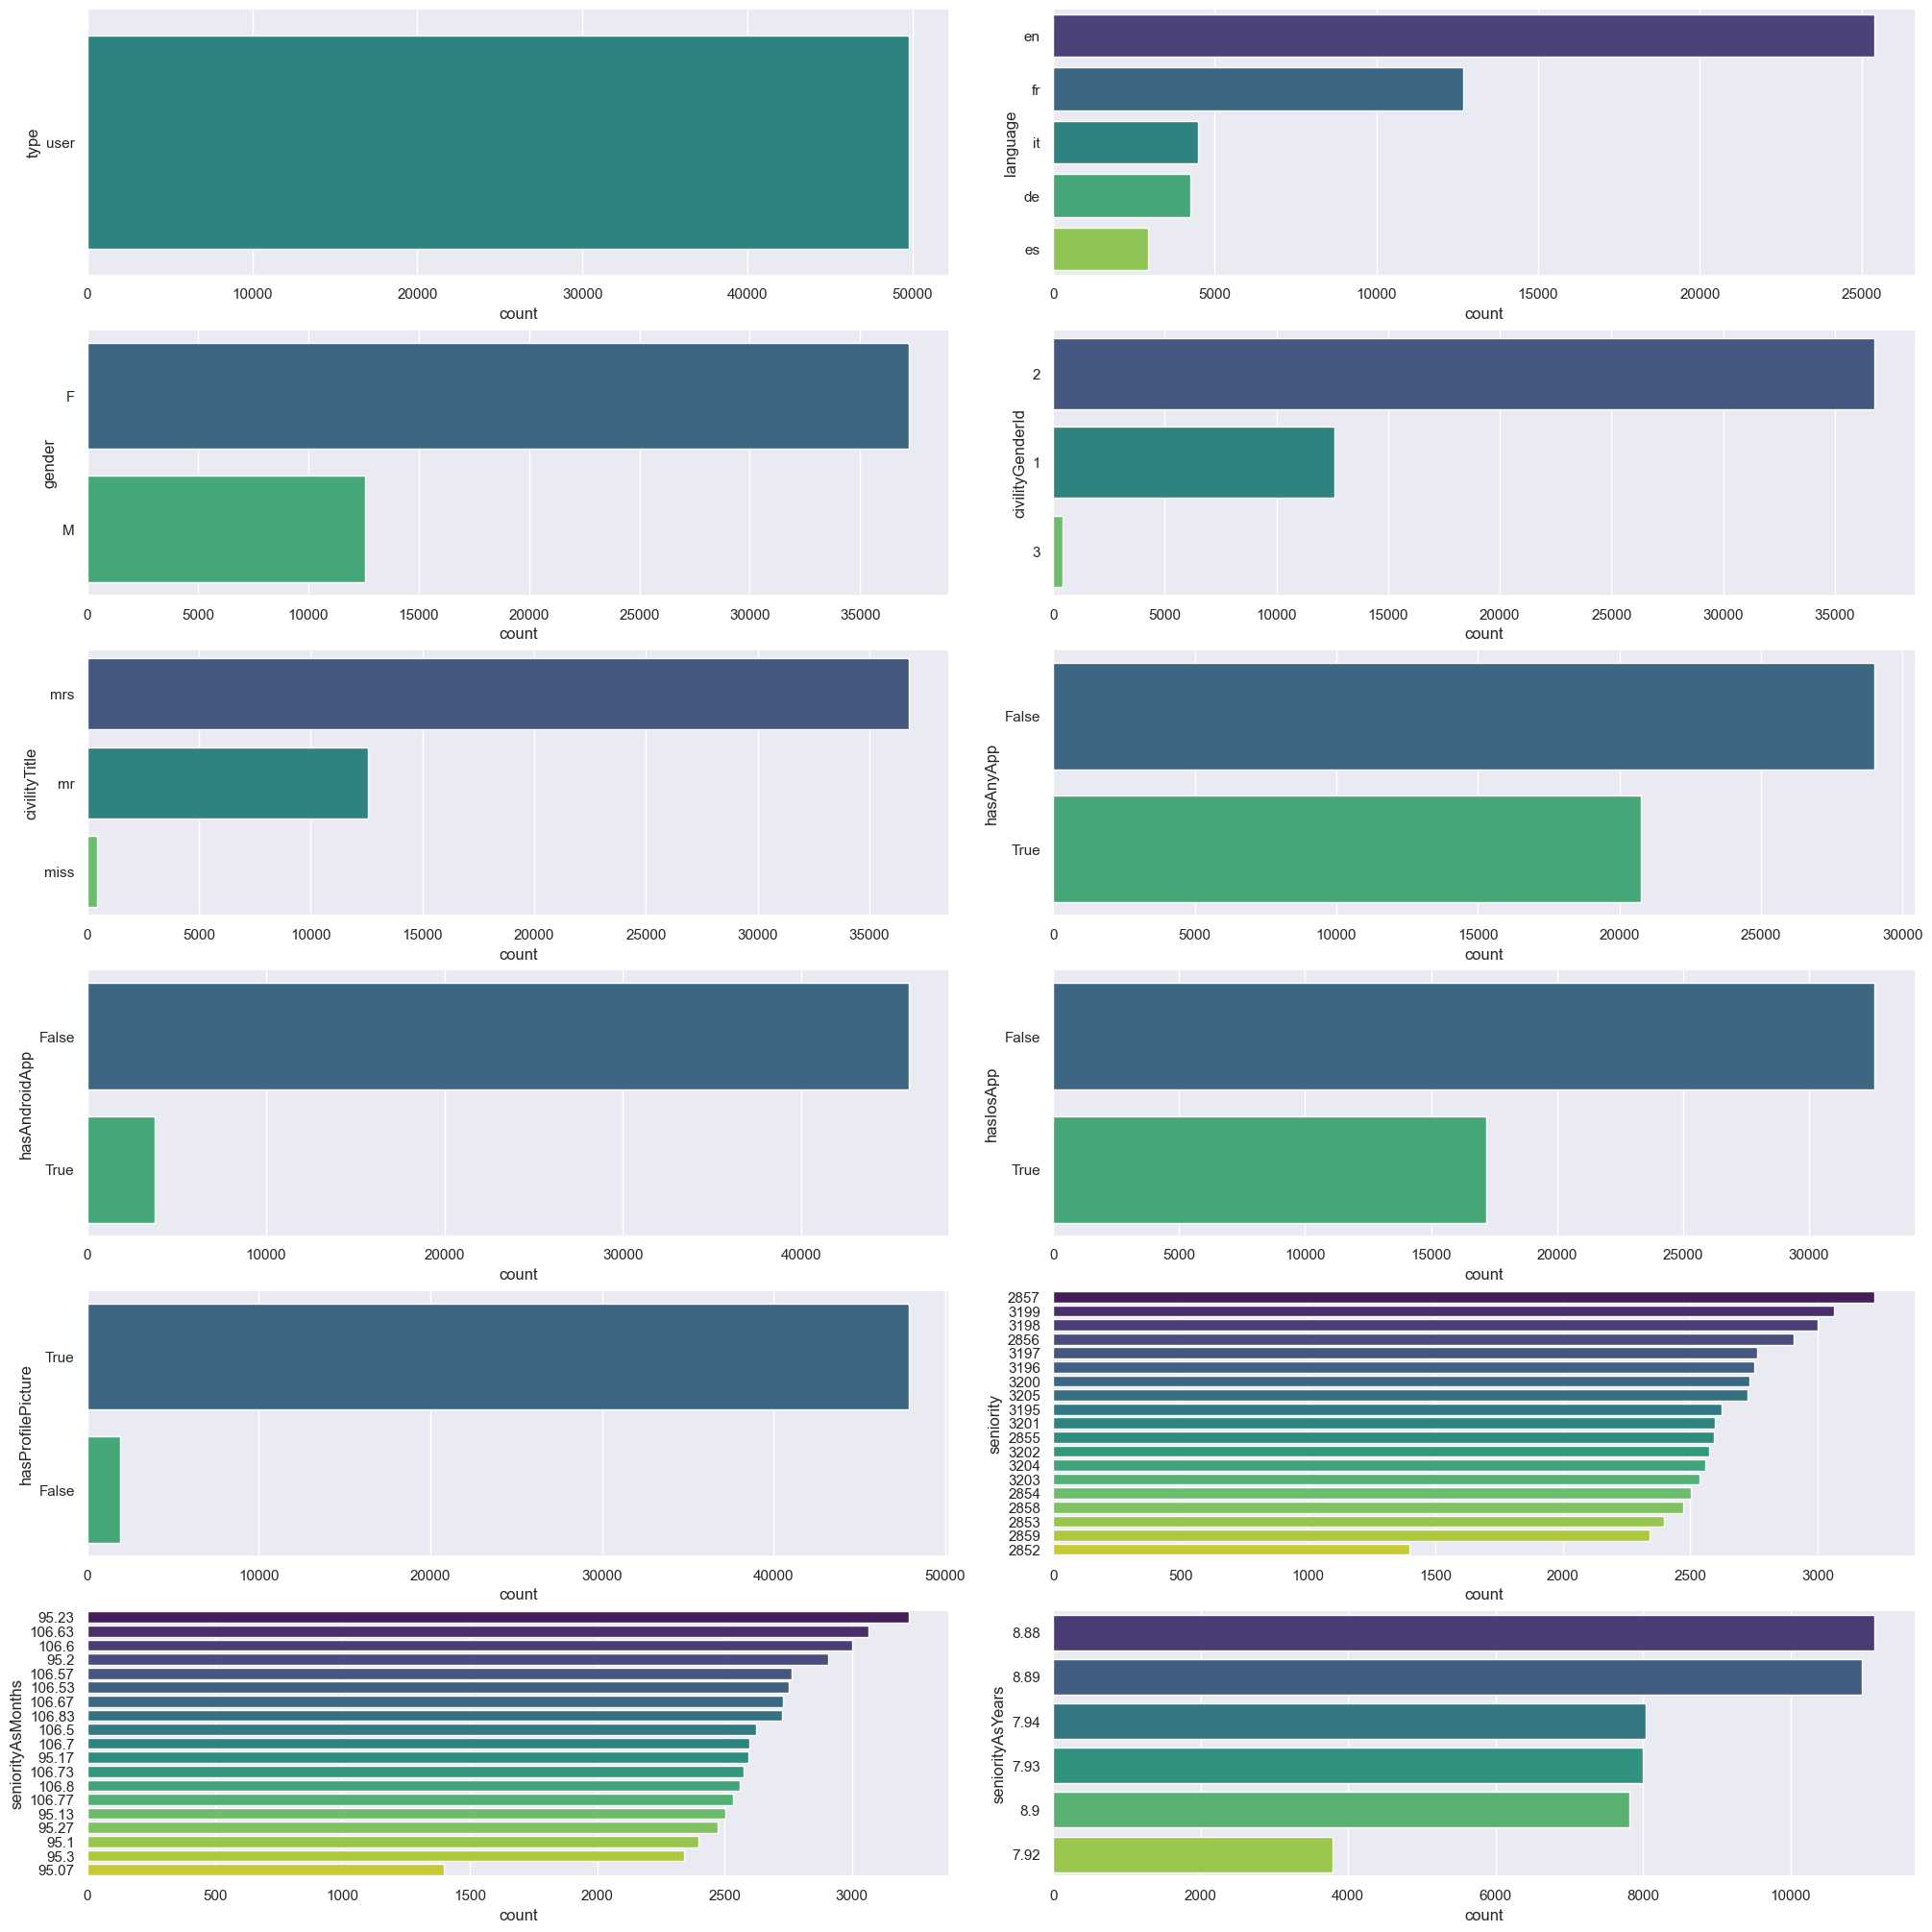

In [446]:
fig, axs = plt.subplots(6, 2, figsize=(20, 20), constrained_layout=True)
categorical = ['type', 'language', 'gender',
               'civilityGenderId', 'civilityTitle', 'hasAnyApp', 'hasAndroidApp',
               'hasIosApp', 'hasProfilePicture', 'seniority',
               'seniorityAsMonths', 'seniorityAsYears', ]
for i, f in enumerate(categorical):
    sns.countplot(y=f, data=df,
                  ax=axs[i//2][i % 2],
                  order=df[f].value_counts().index, palette='viridis')

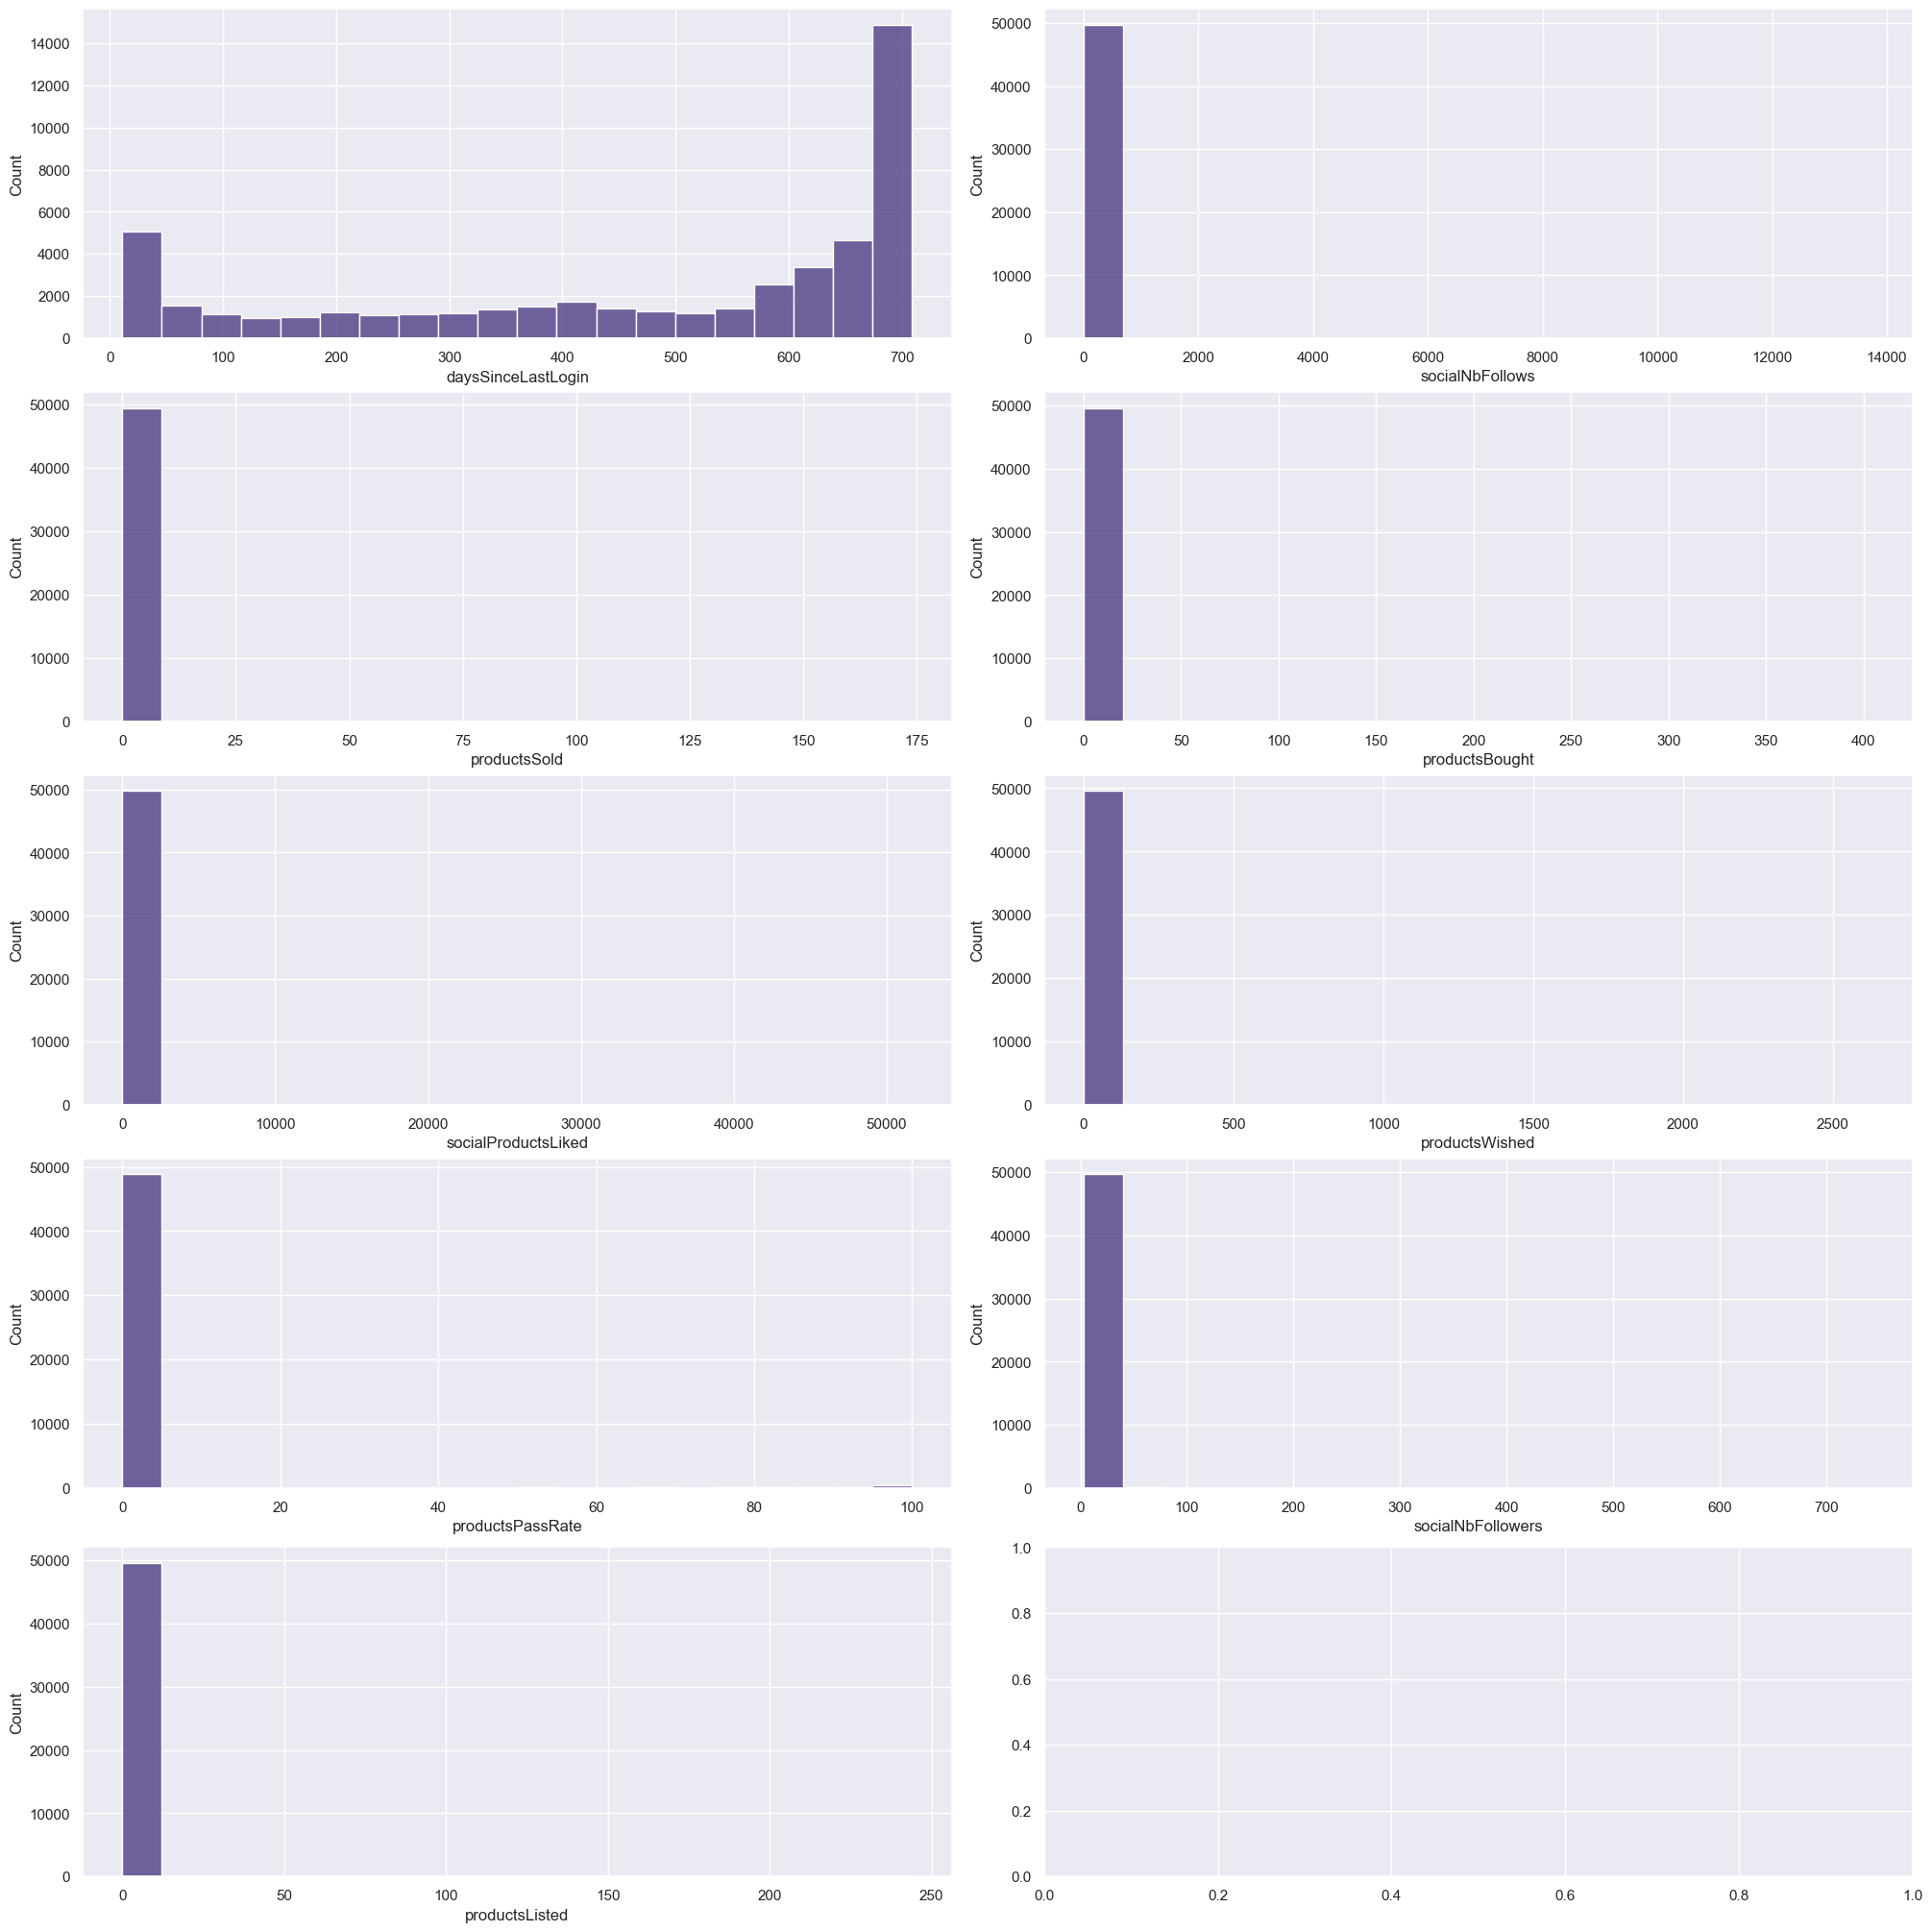

In [447]:
numerical = set(df.columns)-set(categorical)-{'countryCode', 'country'}
fig, axs = plt.subplots(len(numerical)//2+1, 2,
                        figsize=(20, 20), constrained_layout=True)

for i, f in enumerate(numerical):
    sns.histplot(x=f, data=df,
                 ax=axs[i//2][i % 2], bins=20,
                 palette=sns.color_palette("viridis", 2))

plt.show()

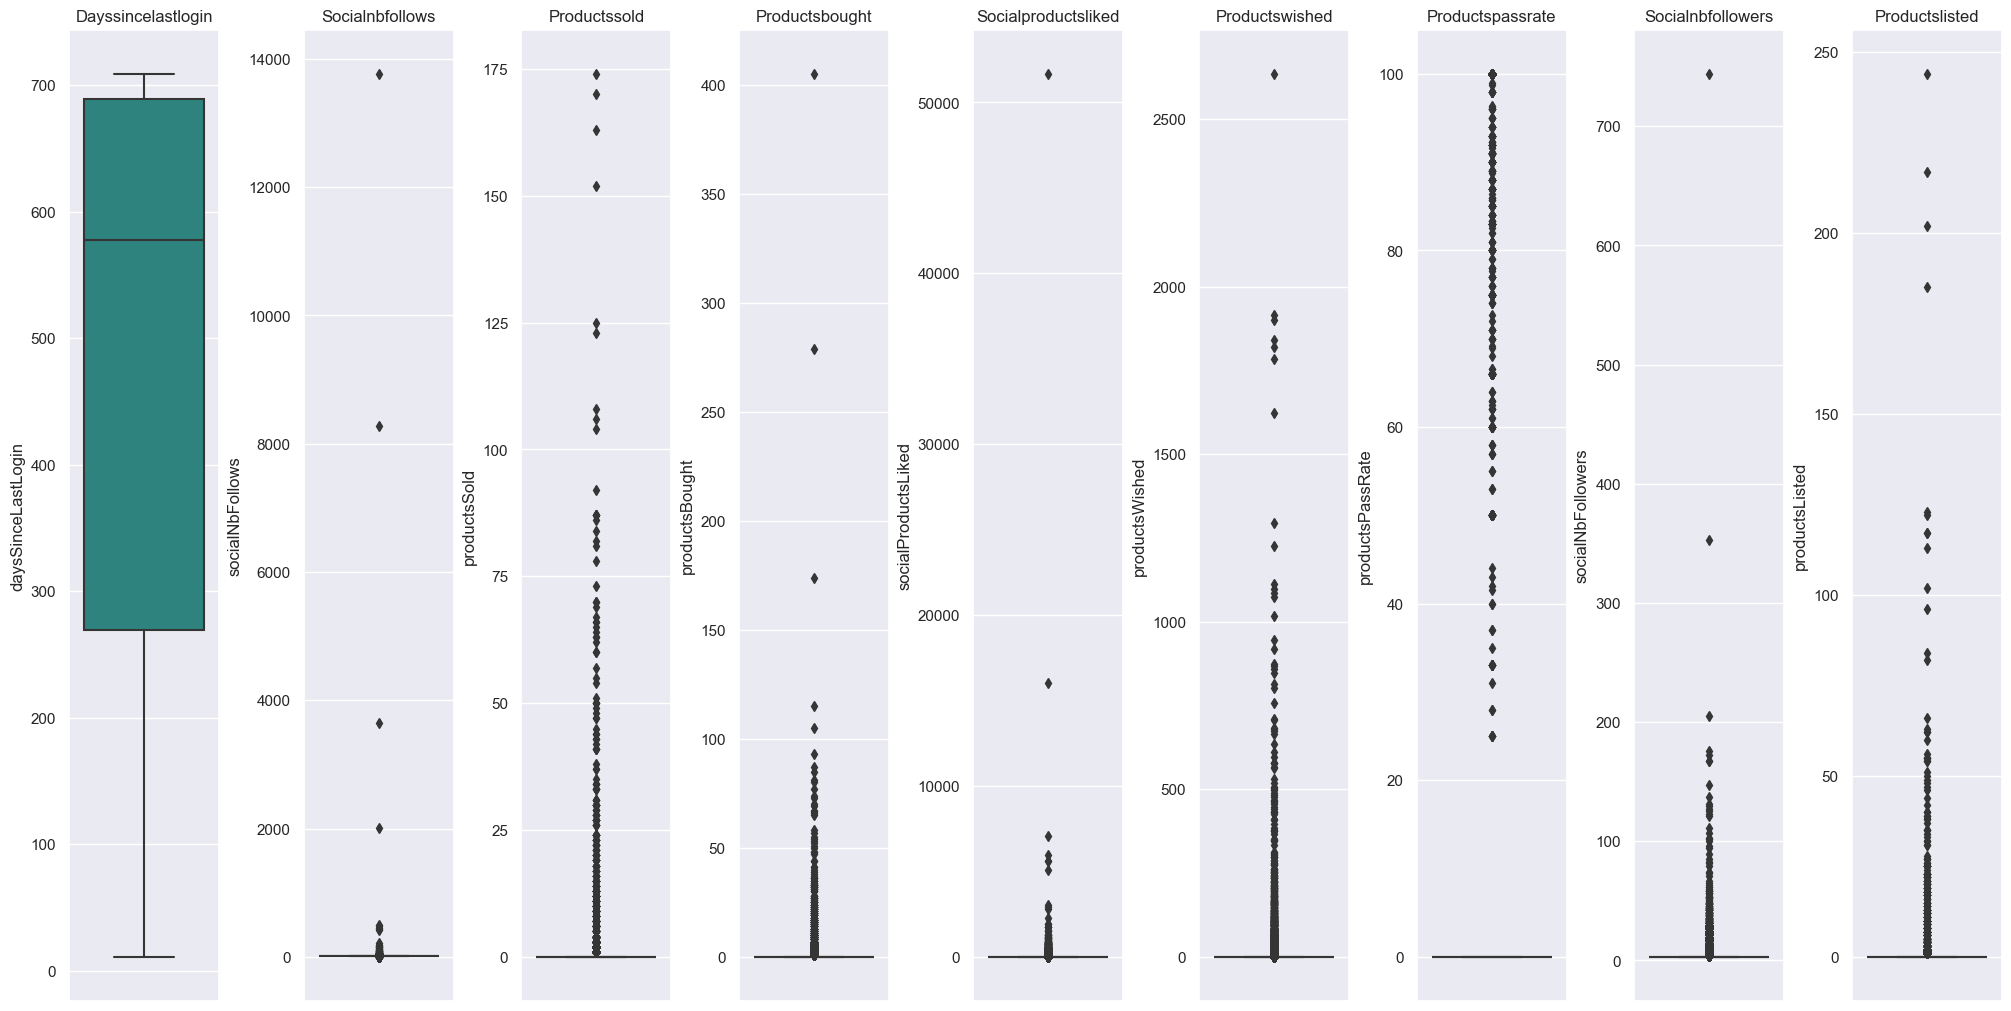

In [448]:
fig, axs = plt.subplots(1, 9,
                        figsize=(20, 10), constrained_layout=True)
for i, f in enumerate(numerical):
    sns.boxplot(y=f,  data=df,  ax=axs[i],
                palette="viridis")
    axs[i].set_title(f.capitalize())


plt.show()

In [449]:
numerical

{'daysSinceLastLogin',
 'productsBought',
 'productsListed',
 'productsPassRate',
 'productsSold',
 'productsWished',
 'socialNbFollowers',
 'socialNbFollows',
 'socialProductsLiked'}

In [450]:
df[df['socialNbFollows'] <= 8].shape

(45936, 23)

In [451]:
df['socialNbFollows'] = df['socialNbFollows'].apply(
    lambda x: 1 if x > 8 else 0)

In [452]:
df[df['socialProductsLiked'] == 0].shape

(34614, 23)

In [453]:
df['socialProductsLiked'] = df['socialProductsLiked'].apply(
    lambda x: 1 if x > 0 else 0)

In [454]:
df[df['productsSold'] == 0].shape

(47724, 23)

In [455]:
df['productsSold'] = df['productsSold'].apply(lambda x: 1 if x > 0 else 0)

In [456]:
df[df['productsWished'] == 0].shape

(40753, 23)

In [457]:
df['productsWished'] = df['productsWished'].apply(lambda x: 1 if x > 0 else 0)

In [458]:
df[df['productsPassRate'] == 0].shape

(48826, 23)

In [459]:
df['productsPassRate'] = df['productsPassRate'].apply(
    lambda x: 1 if x > 0 else 0)

In [460]:
df[df['socialNbFollowers'] == 3].shape

(39059, 23)

In [461]:
df['socialNbFollowers'] = df['socialNbFollowers'].apply(
    lambda x: 1 if x > 3 else 0)

In [462]:
df[df['productsListed'] == 0].shape

(48036, 23)

In [463]:
df['productsListed'] = df['productsListed'].apply(lambda x: 1 if x > 0 else 0)

In [464]:
df[df['productsBought'] == 0].shape

(44428, 23)

In [465]:
df['productsBought'] = df['productsBought'].apply(lambda x: 1 if x > 0 else 0)

In [466]:
df[df['daysSinceLastLogin'] > 350].shape

(34337, 23)

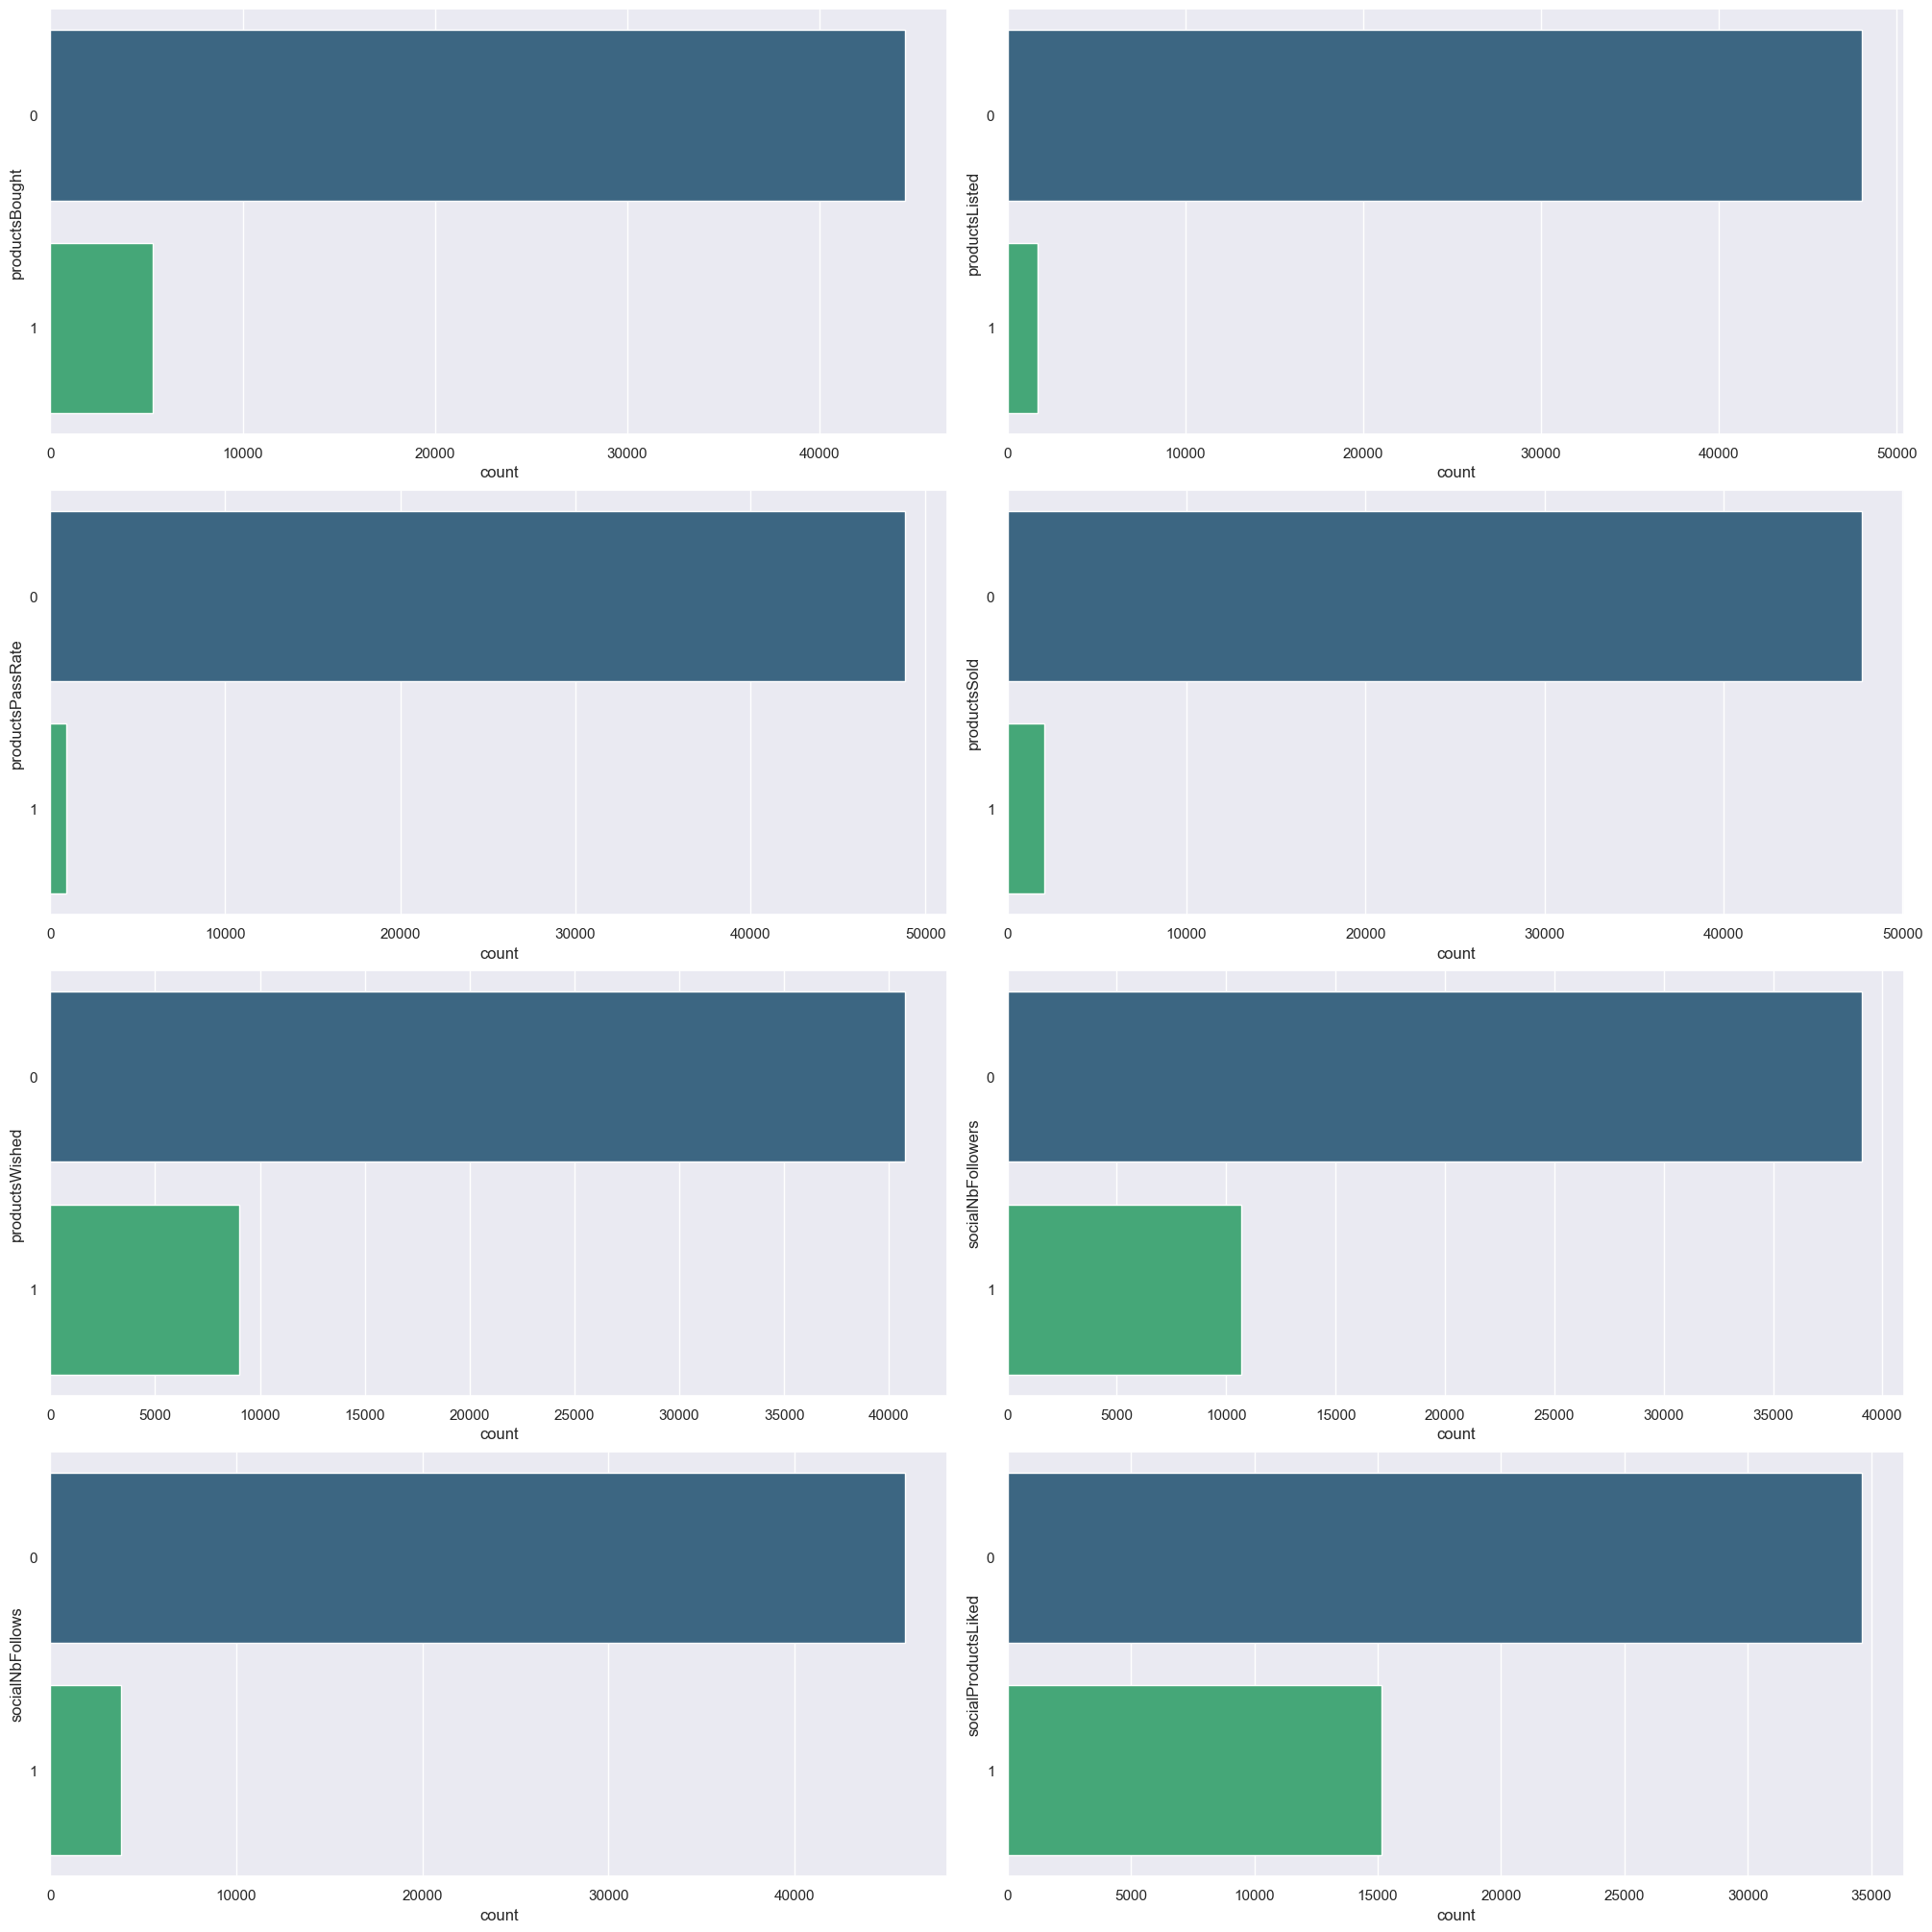

In [467]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20), constrained_layout=True)
cols = ['productsBought', 'productsListed', 'productsPassRate',
        'productsSold', 'productsWished', 'socialNbFollowers', 'socialNbFollows', 'socialProductsLiked']
for i, f in enumerate(cols):
    sns.countplot(y=f, data=df,
                  ax=axs[i//2][i % 2],
                  order=df[f].value_counts().index, palette='viridis')

In [468]:
df.head()

type      country language  socialNbFollowers  socialNbFollows  \
0  user  Royaume-Uni       en                  1                1   
1  user       Monaco       en                  1                0   
2  user       France       fr                  1                1   
3  user   Etats-Unis       en                  1                1   
4  user   Etats-Unis       en                  1                0   

   socialProductsLiked  productsListed  productsSold  productsPassRate  \
0                    1               1             1                 1   
1                    1               1             1                 1   
2                    1               1             1                 1   
3                    1               1             1                 1   
4                    0               1             1                 1   

   productsWished  productsBought gender  civilityGenderId civilityTitle  \
0               1               1      M                 1            mr   
1               0               0      F                 2           mrs   
2               1               1      F                 2           mrs   
3               1               0      F                 2           mrs   
4               0               0      F                 2           mrs   

   hasAnyApp  hasAndroidApp  hasIosApp  hasProfilePicture  daysSinceLastLogin  \
0       True          False       True               True                  11   
1       True          False       True               True                  12   
2       True          False       True              False                  11   
3       True          False       True              False                  12   
4      False          False      False               True                  22   

   seniority  seniorityAsMonths  seniorityAsYears countryCode  
0       3196             106.53              8.88          gb  
1       3204             106.80              8.90          mc  
2       3203             106.77              8.90          fr  
3       3198             106.60              8.88          us  
4       2854              95.13              7.93          us

In [469]:
df.drop(['type'], axis=1, inplace=True)

In [470]:
df.head()

country language  socialNbFollowers  socialNbFollows  \
0  Royaume-Uni       en                  1                1   
1       Monaco       en                  1                0   
2       France       fr                  1                1   
3   Etats-Unis       en                  1                1   
4   Etats-Unis       en                  1                0   

   socialProductsLiked  productsListed  productsSold  productsPassRate  \
0                    1               1             1                 1   
1                    1               1             1                 1   
2                    1               1             1                 1   
3                    1               1             1                 1   
4                    0               1             1                 1   

   productsWished  productsBought gender  civilityGenderId civilityTitle  \
0               1               1      M                 1            mr   
1               0               0      F                 2           mrs   
2               1               1      F                 2           mrs   
3               1               0      F                 2           mrs   
4               0               0      F                 2           mrs   

   hasAnyApp  hasAndroidApp  hasIosApp  hasProfilePicture  daysSinceLastLogin  \
0       True          False       True               True                  11   
1       True          False       True               True                  12   
2       True          False       True              False                  11   
3       True          False       True              False                  12   
4      False          False      False               True                  22   

   seniority  seniorityAsMonths  seniorityAsYears countryCode  
0       3196             106.53              8.88          gb  
1       3204             106.80              8.90          mc  
2       3203             106.77              8.90          fr  
3       3198             106.60              8.88          us  
4       2854              95.13              7.93          us

In [471]:
# encode categorical
df["gender"] = df["gender"].map({'M': 0, 'F': 1})

In [472]:
country_count = dict(df['countryCode'].value_counts())
df['countryCode'] = df['countryCode'].map(country_count)

In [473]:
df.head()

country language  socialNbFollowers  socialNbFollows  \
0  Royaume-Uni       en                  1                1   
1       Monaco       en                  1                0   
2       France       fr                  1                1   
3   Etats-Unis       en                  1                1   
4   Etats-Unis       en                  1                0   

   socialProductsLiked  productsListed  productsSold  productsPassRate  \
0                    1               1             1                 1   
1                    1               1             1                 1   
2                    1               1             1                 1   
3                    1               1             1                 1   
4                    0               1             1                 1   

   productsWished  productsBought  gender  civilityGenderId civilityTitle  \
0               1               1       0                 1            mr   
1               0               0       1                 2           mrs   
2               1               1       1                 2           mrs   
3               1               0       1                 2           mrs   
4               0               0       1                 2           mrs   

   hasAnyApp  hasAndroidApp  hasIosApp  hasProfilePicture  daysSinceLastLogin  \
0       True          False       True               True                  11   
1       True          False       True               True                  12   
2       True          False       True              False                  11   
3       True          False       True              False                  12   
4      False          False      False               True                  22   

   seniority  seniorityAsMonths  seniorityAsYears  countryCode  
0       3196             106.53              8.88         5454  
1       3204             106.80              8.90           34  
2       3203             106.77              8.90        11145  
3       3198             106.60              8.88         7459  
4       2854              95.13              7.93         7459

In [474]:
country_count = dict(df['country'].value_counts())
df['country'] = df['country'].map(country_count)

In [475]:
df = pd.get_dummies(df, columns=['language', 'civilityTitle'])

In [476]:
df.head()

country  socialNbFollowers  socialNbFollows  socialProductsLiked  \
0     5454                  1                1                    1   
1       34                  1                0                    1   
2    11145                  1                1                    1   
3     7459                  1                1                    1   
4     7459                  1                0                    0   

   productsListed  productsSold  productsPassRate  productsWished  \
0               1             1                 1               1   
1               1             1                 1               0   
2               1             1                 1               1   
3               1             1                 1               1   
4               1             1                 1               0   

   productsBought  gender  civilityGenderId  hasAnyApp  hasAndroidApp  \
0               1       0                 1       True          False   
1               0       1                 2       True          False   
2               1       1                 2       True          False   
3               0       1                 2       True          False   
4               0       1                 2      False          False   

   hasIosApp  hasProfilePicture  daysSinceLastLogin  seniority  \
0       True               True                  11       3196   
1       True               True                  12       3204   
2       True              False                  11       3203   
3       True              False                  12       3198   
4      False               True                  22       2854   

   seniorityAsMonths  seniorityAsYears  countryCode  language_de  language_en  \
0             106.53              8.88         5454        False         True   
1             106.80              8.90           34        False         True   
2             106.77              8.90        11145        False        False   
3             106.60              8.88         7459        False         True   
4              95.13              7.93         7459        False         True   

   language_es  language_fr  language_it  civilityTitle_miss  \
0        False        False        False               False   
1        False        False        False               False   
2        False         True        False               False   
3        False        False        False               False   
4        False        False        False               False   

   civilityTitle_mr  civilityTitle_mrs  
0              True              False  
1             False               True  
2             False               True  
3             False               True  
4             False               True

<Axes: >

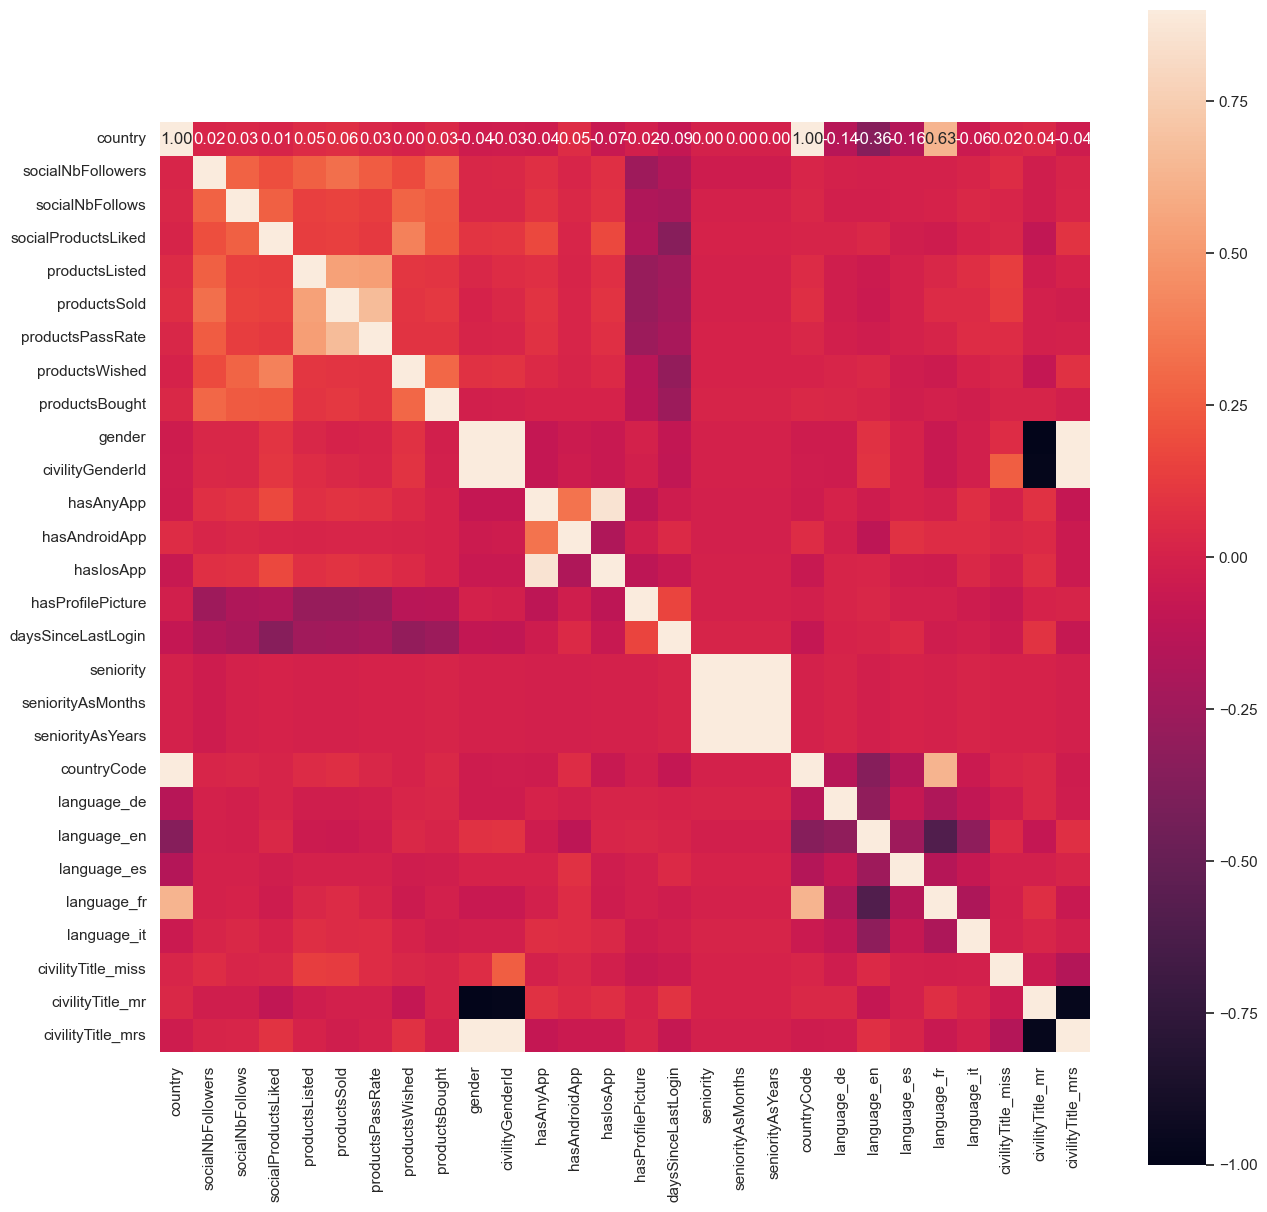

In [477]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix,  vmax=.9, square=True,
            annot=True, fmt='.2f')

In [478]:
# drop highly correlated features
df.drop(['civilityTitle_miss', 'civilityTitle_mr', 'civilityTitle_mrs', 'civilityGenderId',
         'seniorityAsMonths', 'seniorityAsYears', 'country'], axis=1, inplace=True)

<Axes: >

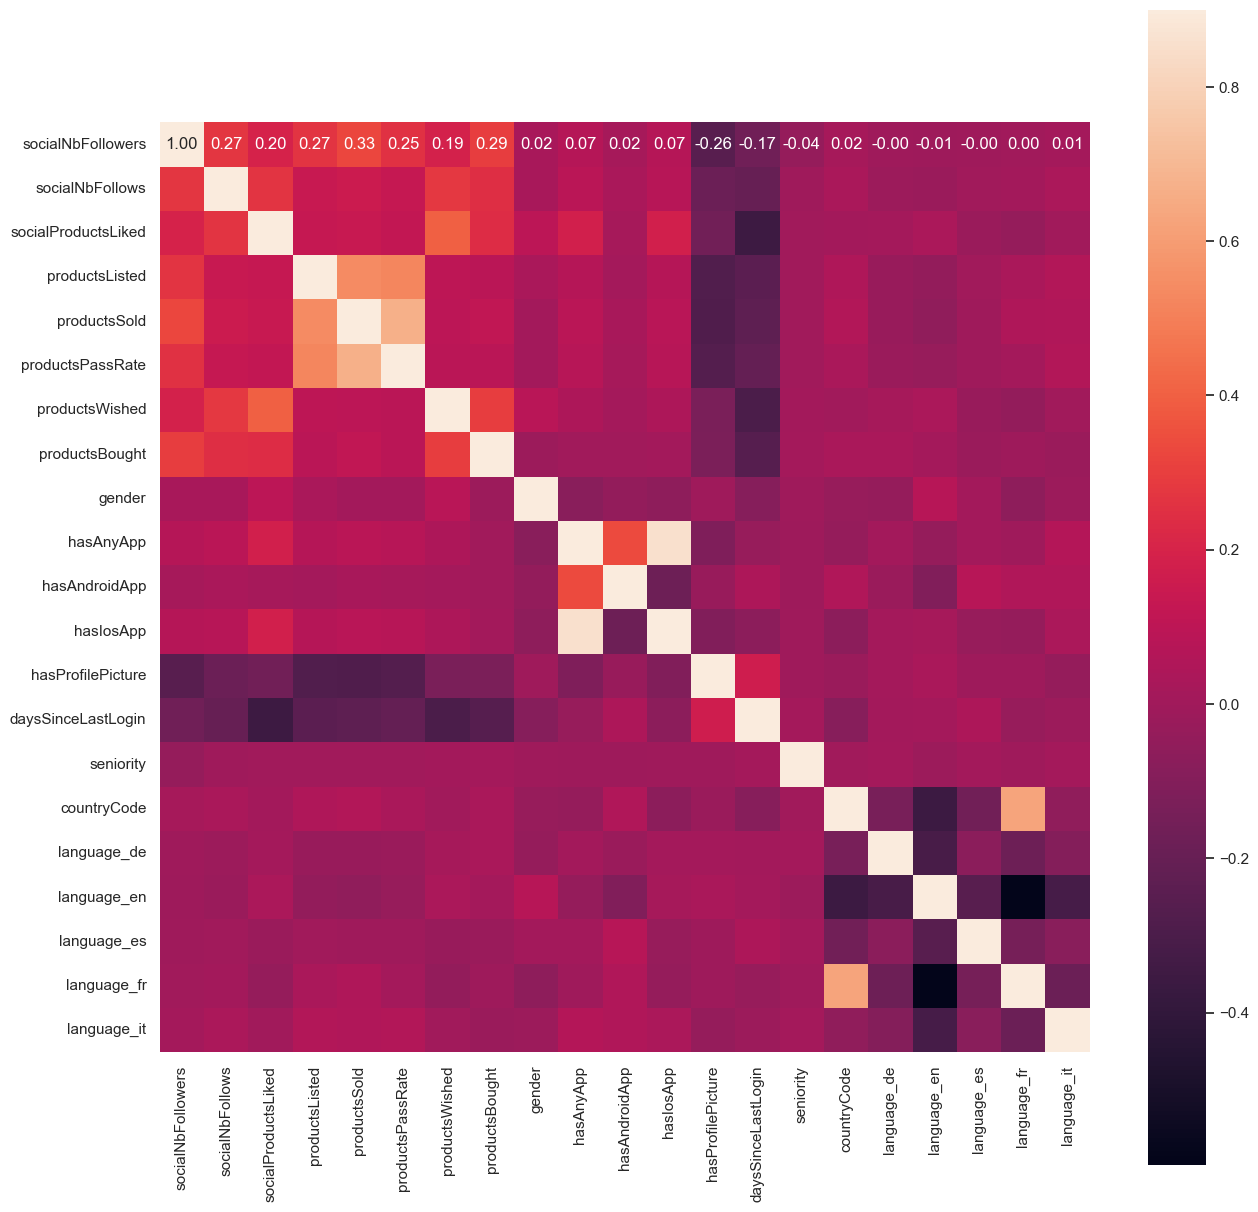

In [479]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix,  vmax=.9, square=True,
            annot=True, fmt='.2f')

In [491]:
# standartize
scaler = MinMaxScaler((-1, 1))
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df.describe()

socialNbFollowers  socialNbFollows  socialProductsLiked  \
count       49760.000000     49760.000000         49760.000000   
mean           -0.569895        -0.846302            -0.391238   
std             0.821725         0.532708             0.920299   
min            -1.000000        -1.000000            -1.000000   
25%            -1.000000        -1.000000            -1.000000   
50%            -1.000000        -1.000000            -1.000000   
75%            -1.000000        -1.000000             1.000000   
max             1.000000         1.000000             1.000000   

       productsListed  productsSold  productsPassRate  productsWished  \
count    49760.000000  49760.000000      49760.000000    49760.000000   
mean        -0.930707     -0.918167         -0.962460       -0.637982   
std          0.365768      0.396197          0.271427        0.770059   
min         -1.000000     -1.000000         -1.000000       -1.000000   
25%         -1.000000     -1.000000         -1.000000       -1.000000   
50%         -1.000000     -1.000000         -1.000000       -1.000000   
75%         -1.000000     -1.000000         -1.000000       -1.000000   
max          1.000000      1.000000          1.000000        1.000000   

       productsBought        gender     hasAnyApp  hasAndroidApp  \
count    49760.000000  49760.000000  49760.000000   49760.000000   
mean        -0.785691      0.494695     -0.165555      -0.848834   
std          0.618625      0.869076      0.986211       0.528664   
min         -1.000000     -1.000000     -1.000000      -1.000000   
25%         -1.000000     -1.000000     -1.000000      -1.000000   
50%         -1.000000      1.000000     -1.000000      -1.000000   
75%         -1.000000      1.000000      1.000000      -1.000000   
max          1.000000      1.000000      1.000000       1.000000   

          hasIosApp  hasProfilePicture  daysSinceLastLogin     seniority  \
count  49760.000000       49760.000000        49760.000000  49760.000000   
mean      -0.309807           0.924156            0.306102      0.193923   
std        0.950809           0.382019            0.698404      0.954915   
min       -1.000000          -1.000000           -1.000000     -1.000000   
25%       -1.000000           1.000000           -0.260745     -0.971671   
50%       -1.000000           1.000000            0.624642      0.949008   
75%        1.000000           1.000000            0.942693      0.977337   
max        1.000000           1.000000            1.000000      1.000000   

        countryCode   language_de   language_en   language_es   language_fr  \
count  49760.000000  49760.000000  49760.000000  49760.000000  49760.000000   
mean      -0.051850     -0.828859      0.020740     -0.881551     -0.489952   
std        0.700701      0.559464      0.999795      0.472093      0.871758   
min       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%       -0.770818     -1.000000     -1.000000     -1.000000     -1.000000   
50%       -0.169598     -1.000000      1.000000     -1.000000     -1.000000   
75%        0.338478     -1.000000      1.000000     -1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        language_it  
count  49760.000000  
mean      -0.820378  
std        0.571828  
min       -1.000000  
25%       -1.000000  
50%       -1.000000  
75%       -1.000000  
max        1.000000

In [481]:
df.head()

socialNbFollowers  socialNbFollows  socialProductsLiked  productsListed  \
0                1.0              1.0                  1.0             1.0   
1                1.0              0.0                  1.0             1.0   
2                1.0              1.0                  1.0             1.0   
3                1.0              1.0                  1.0             1.0   
4                1.0              0.0                  0.0             1.0   

   productsSold  productsPassRate  productsWished  productsBought  gender  \
0           1.0               1.0             1.0             1.0    -1.0   
1           1.0               1.0             0.0             0.0     0.0   
2           1.0               1.0             1.0             1.0     0.0   
3           1.0               1.0             1.0             0.0     0.0   
4           1.0               1.0             0.0             0.0     0.0   

   hasAnyApp  hasAndroidApp  hasIosApp  hasProfilePicture  daysSinceLastLogin  \
0        1.0            0.0        1.0                0.0           -1.350000   
1        1.0            0.0        1.0                0.0           -1.347619   
2        1.0            0.0        1.0               -1.0           -1.350000   
3        1.0            0.0        1.0               -1.0           -1.347619   
4        0.0            0.0        0.0                0.0           -1.323810   

   seniority  countryCode  language_de  language_en  language_es  language_fr  \
0   0.000000     0.133635          0.0          0.0          0.0          0.0   
1   0.023256    -0.743245          0.0          0.0          0.0          0.0   
2   0.020349     1.054360          0.0         -1.0          0.0          1.0   
3   0.005814     0.458017          0.0          0.0          0.0          0.0   
4  -0.994186     0.458017          0.0          0.0          0.0          0.0   

   language_it  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

2 3 4 5 6 7 8 9 10 11 

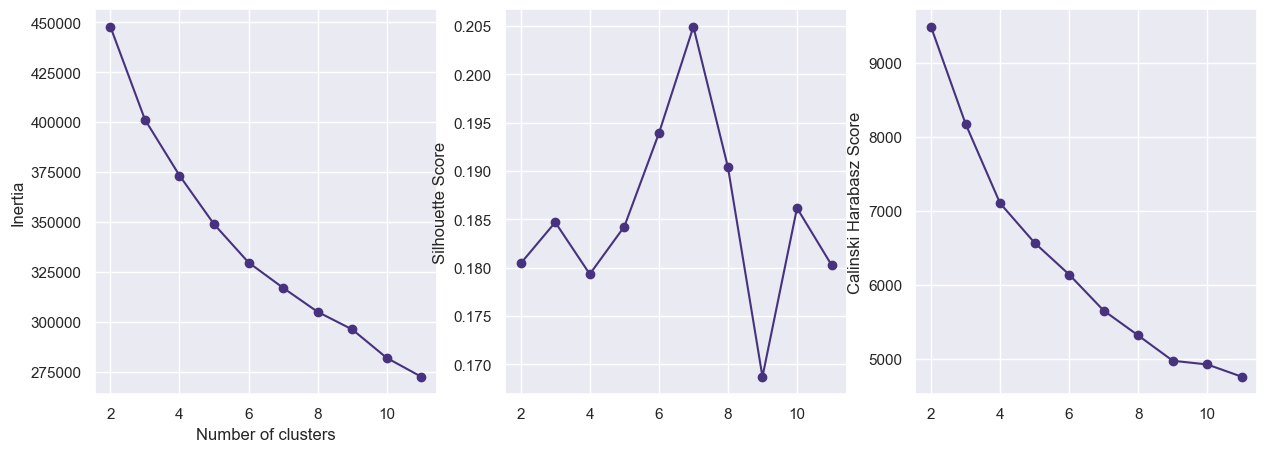

In [570]:
k_range = range(2, 12)
inertia = []
silhouette = []
calinski = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    silhouette.append(metrics.silhouette_score(
        df, kmeans.labels_, sample_size=10000))
    calinski.append(metrics.calinski_harabasz_score(df, kmeans.labels_))
    print(k, end=' ')

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette, marker='o')
plt.ylabel('Silhouette Score')
plt.subplot(1, 3, 3)
plt.plot(k_range, calinski, marker='o')
plt.ylabel('Calinski Harabasz Score')
plt.show()

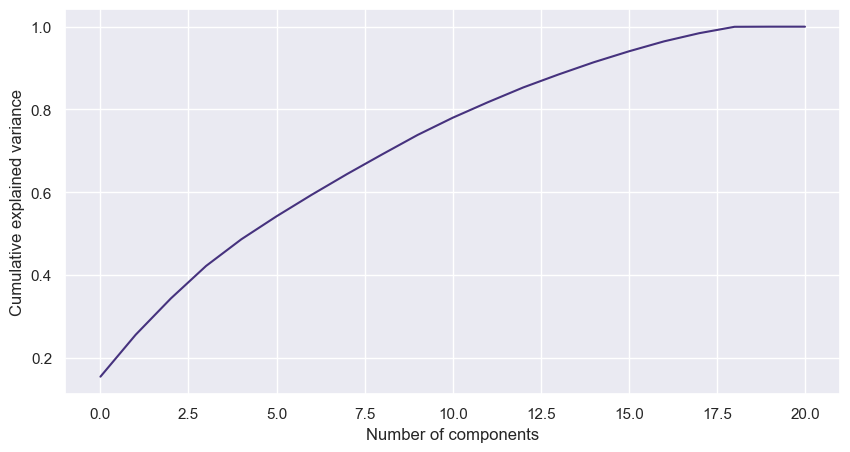

In [287]:
# apply pca
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
data_pca = pca.transform(df)

# plot pca
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [577]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(df)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(df)

# Plot the original data with cluster assignments
plt.figure(figsize=(20, 5))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(1, 4, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=clusters,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

In [578]:
centroids = kmeans.cluster_centers_

# Feature importance based on centroid differences
feature_importance = centroids.std(axis=0)

# plot importance
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance based on centroids')
plt.show()

In [574]:
important_columns = df.columns[feature_importance > 0.25]
important_columns

Index(['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked',
       'productsWished', 'productsBought', 'hasAnyApp', 'hasIosApp',
       'daysSinceLastLogin', 'countryCode', 'language_de', 'language_en',
       'language_fr', 'language_it'],
      dtype='object')

In [581]:

cluster_data = np.array(
    [df[clusters == i][important_columns].mean(axis=0) for i in range(7)])
cluster_data = pd.DataFrame(
    cluster_data.T, columns=range(7), index=important_columns)
cluster_data.loc['activity'] = cluster_data.loc['socialNbFollowers']+cluster_data.loc['socialNbFollows'] + \
    cluster_data.loc['socialProductsLiked']+cluster_data.loc['productsWished'] + \
    cluster_data.loc['productsBought']
cluster_data

0         1         2         3         4  \
socialNbFollowers   -0.661862 -0.731601 -0.685260 -0.682458 -0.701925   
socialNbFollows     -0.903005 -0.940697 -0.923259 -0.910798 -0.938677   
socialProductsLiked -0.655998 -0.355464 -0.624070 -0.406743 -0.594540   
productsWished      -0.761544 -0.783107 -0.737661 -0.801536 -0.736787   
productsBought      -0.833374 -0.940461 -0.845504 -0.947930 -0.864193   
hasAnyApp           -0.785732  1.000000 -1.000000  1.000000 -1.000000   
hasIosApp           -1.000000  0.792558 -1.000000  0.538626 -1.000000   
daysSinceLastLogin   0.332879  0.450374  0.423735  0.438747  0.397720   
countryCode          0.671974 -0.392825 -0.328719 -0.334979 -0.245285   
language_de         -1.000000 -1.000000 -0.221433 -0.317968 -1.000000   
language_en         -1.000000  1.000000 -1.000000 -1.000000  1.000000   
language_fr          1.000000 -1.000000 -1.000000 -1.000000 -1.000000   
language_it         -1.000000 -1.000000 -0.317106 -0.157064 -1.000000   
activity            -3.815783 -3.751329 -3.815754 -3.749466 -3.836122   

                            5         6  
socialNbFollowers    0.643541 -0.533894  
socialNbFollows     -0.057895 -0.835230  
socialProductsLiked  0.920096 -0.208808  
productsWished       0.659330 -0.740722  
productsBought       0.238756 -0.871351  
hasAnyApp            0.287560  1.000000  
hasIosApp            0.061244  0.861455  
daysSinceLastLogin  -0.601862  0.238957  
countryCode         -0.187353  0.753556  
language_de         -0.829187 -1.000000  
language_en          0.266029 -1.000000  
language_fr         -0.778947  1.000000  
language_it         -0.773206 -1.000000  
activity             2.403828 -3.190005

Interpretacija rezultata:
- **AKTIVNI KORISNICI** (klaster 5):
    - skoro su bili ulogovani
    - imaju generalno veci broj pratilaca i pracenih
    - uglavnom su lajkovali, wishlistovali i kupovali proizvode
    - jezici koje govore su raznovrsni ali je engleski najcesci
- **NEAKTIVNI KORISNICI** (ostali klasteri):
    - nemaju dovoljno aktivnosti u prodavnici
    - ...


In [512]:
X = df.values
dendrogram = sch.dendrogram(sch.linkage(
    X, method='ward'), truncate_mode='level', p=4)

In [534]:
agg_clustering = AgglomerativeClustering(n_clusters=2)
labels = agg_clustering.fit_predict(df)


plt.figure(figsize=(20, 5))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(1, 4, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=agg_clustering.labels_,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

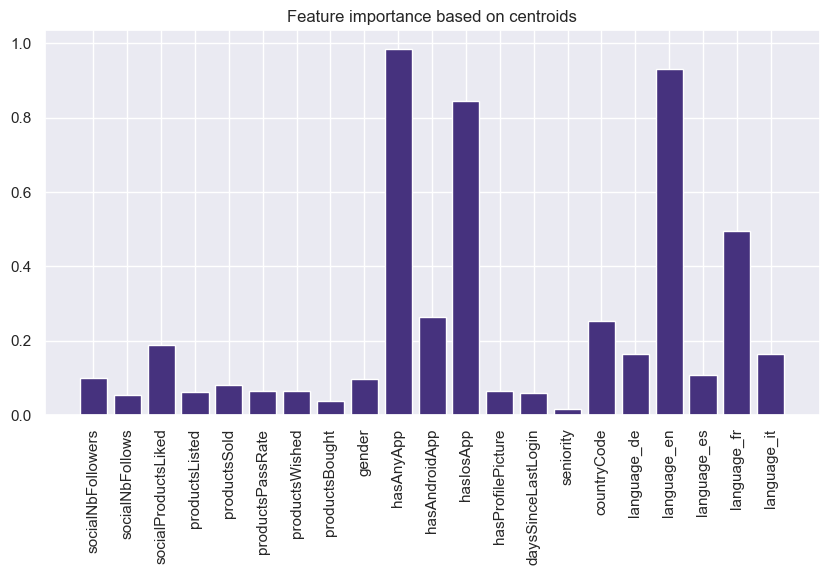

In [545]:
cluster_1 = df[agg_clustering.labels_ == 0]
cluster_2 = df[agg_clustering.labels_ == 1]
cluster_3 = df[agg_clustering.labels_ == 2]
cluster_4 = df[agg_clustering.labels_ == 3]

cluster_1_center = cluster_1.mean(axis=0)
cluster_2_center = cluster_2.mean(axis=0)
cluster_3_center = cluster_3.mean(axis=0)
cluster_4_center = cluster_4.mean(axis=0)

# Feature importance based on centroid differences
feature_importance = np.array(
    [cluster_1_center, cluster_2_center, cluster_3_center, cluster_4_center]).std(axis=0)

# plot importance
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance based on centroids')
plt.show()

In [550]:
important_columns = df.columns[feature_importance > 0.2]
important_columns

Index(['hasAnyApp', 'hasAndroidApp', 'hasIosApp', 'countryCode', 'language_en',
       'language_fr'],
      dtype='object')

In [562]:
clusters = np.array([
    cluster_1[important_columns].mean(axis=0),
    cluster_2[important_columns].mean(axis=0),
    cluster_3[important_columns].mean(axis=0),
    cluster_4[important_columns].mean(axis=0)])

cluster_data = pd.DataFrame(
    clusters.T, columns=[0, 1, 2, 3], index=important_columns)
cluster_data

0         1         2         3
hasAnyApp     -1.000000  1.000000 -1.000000  0.939888
hasAndroidApp -1.000000 -0.373187 -1.000000 -0.951503
hasIosApp     -1.000000  0.395250 -1.000000  0.901172
countryCode    0.213644  0.164453 -0.246322 -0.368846
language_en   -1.000000 -0.815675  1.000000  0.888945
language_fr    0.096224 -0.100258 -1.000000 -0.965155

Interpretacija klastera:
- **1**: NEMAJU aplikaciju i NE govore engleski (pola govori francuski, a pola drugi jezik)
- **2**: IMAJU aplikaciju i NE govore engleski (pola govori francuski, a pola drugi jezik)
- **3**: NEMAJU aplikaciju i govore engleski
- **4**: IMAJU aplikaciju i govore engleski

In [515]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(df)

plt.figure(figsize=(20, 5))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(1, 4, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=agg_clustering.labels_,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

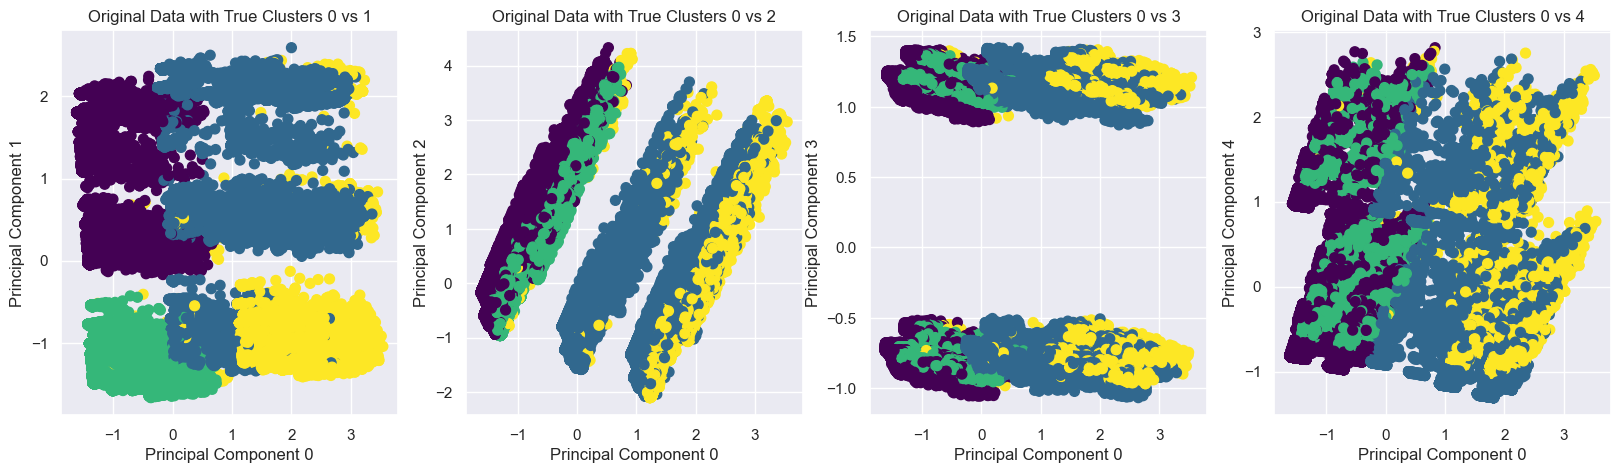

In [536]:
agg_clustering = AgglomerativeClustering(n_clusters=4)
labels = agg_clustering.fit_predict(df)

plt.figure(figsize=(20, 5))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(1, 4, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=agg_clustering.labels_,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

In [541]:
cluster_1 = df[agg_clustering.labels_ == 0]
cluster_2 = df[agg_clustering.labels_ == 3]
print(cluster_1.shape, cluster_2.shape)
cluster_1_center = cluster_1.mean(axis=0)
cluster_2_center = cluster_2.mean(axis=0)

# Feature importance based on centroid differences
feature_importance = np.abs(cluster_1_center - cluster_2_center)

# plot importance
plt.figure(figsize=(10, 5))
plt.bar(df.columns, feature_importance)
plt.xticks(rotation=90)
plt.title('Feature importance based on centroids')
plt.show()

(13614, 21) (9815, 21)


589


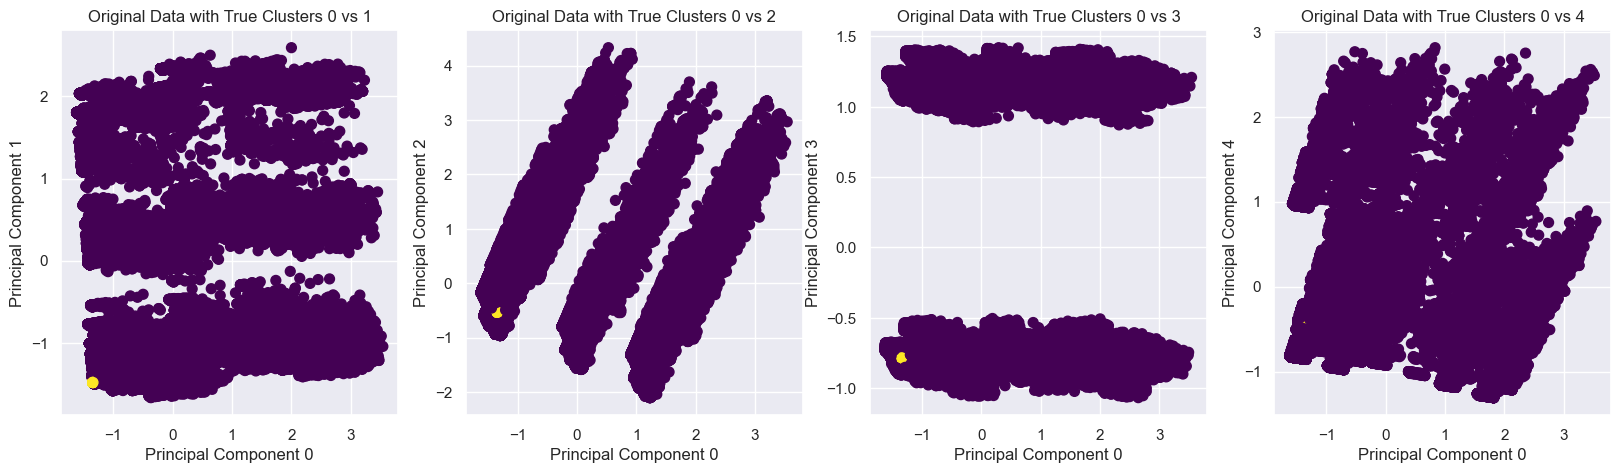

In [524]:
dbscan = DBSCAN(eps=0.05, min_samples=500)
y_dbscan = dbscan.fit_predict(df)

print((y_dbscan != -1).sum())

plt.figure(figsize=(20, 5))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(1, 4, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=y_dbscan,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

In [525]:
print(np.unique(y_dbscan).shape)

(2,)


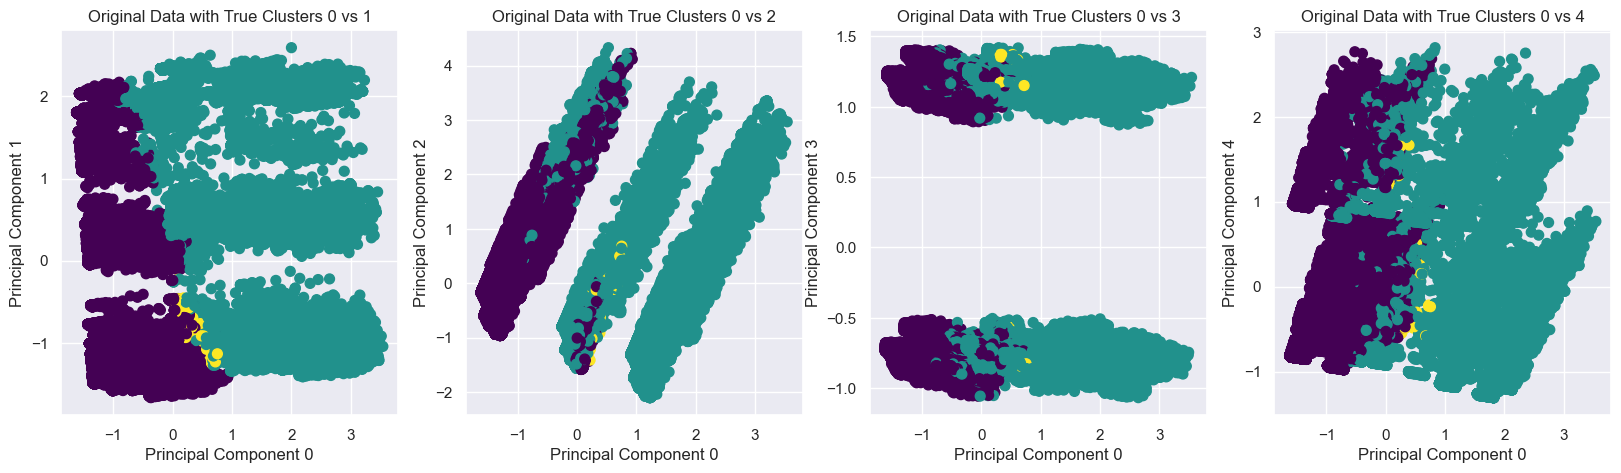

In [531]:
import skfuzzy as fuzz

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    df.T, 3, 2, error=0.005, maxiter=1000, init=None)

cluster_membership = np.argmax(u, axis=0)

plt.figure(figsize=(20, 5))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(1, 4, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=cluster_membership,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

In [101]:
df2 = df.copy()

In [102]:
df2.drop(['seniorityAsYears', 'seniorityAsMonths'], axis=1, inplace=True)

In [103]:
k_range = range(2, 21)
inertia = []
silhouette = []
calinski = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df2)
    inertia.append(kmeans.inertia_)
    silhouette.append(metrics.silhouette_score(
        df2, kmeans.labels_, sample_size=10000))
    calinski.append(metrics.calinski_harabasz_score(df2, kmeans.labels_))
    print(k, end=' ')

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette, marker='o')
plt.ylabel('Silhouette Score')
plt.subplot(1, 3, 3)
plt.plot(k_range, calinski, marker='o')
plt.ylabel('Calinski Harabasz Score')
plt.show()

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

In [104]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df2)
data_pca = pca.transform(df2)

# plot pca
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

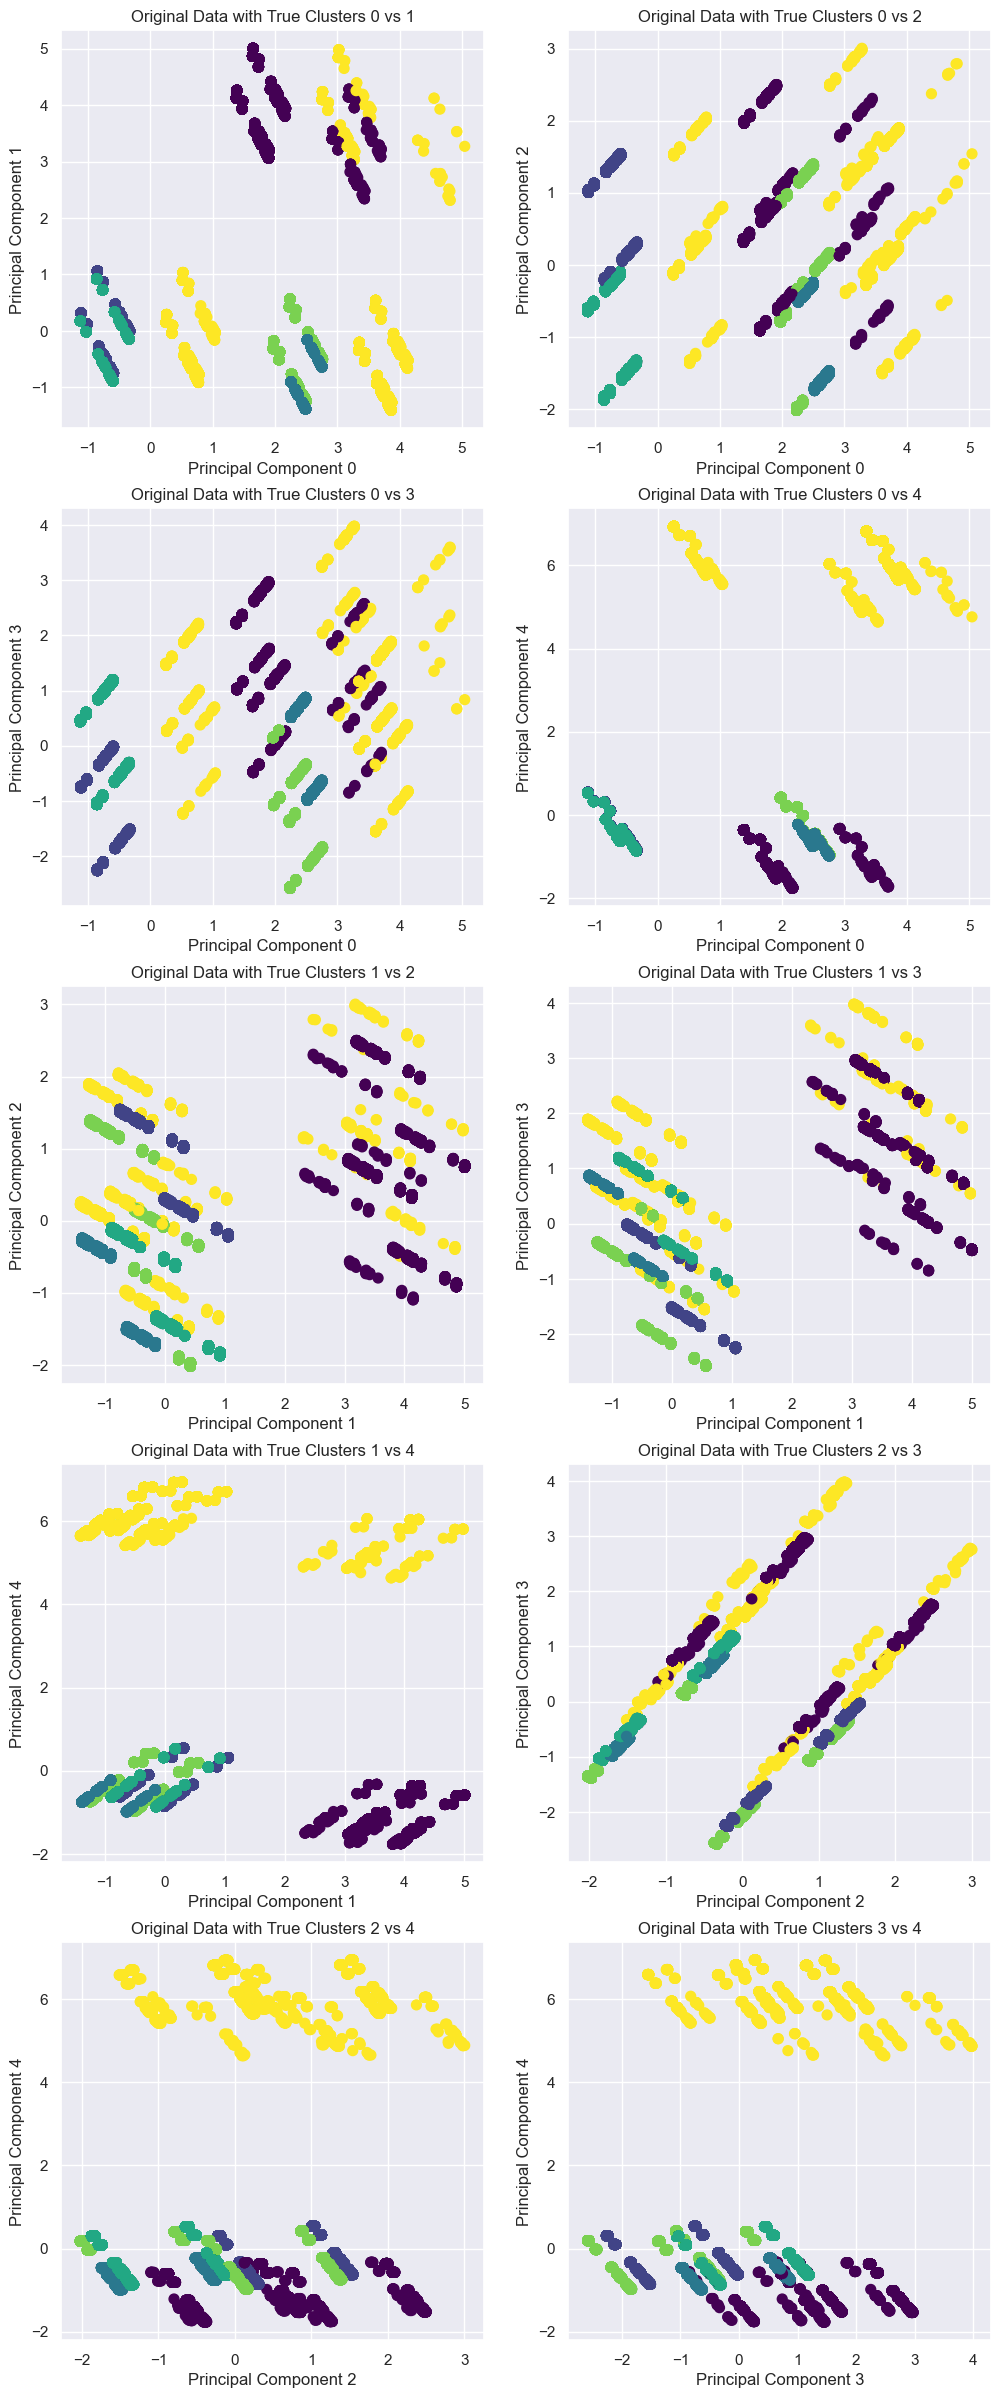

In [105]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(df2)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(df2)

# Plot the original data with cluster assignments
plt.figure(figsize=(12, 30))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2),
                    (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(5, 2, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=clusters,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

In [106]:
agg_clustering = AgglomerativeClustering(n_clusters=6)
labels = agg_clustering.fit_predict(df2)


plt.figure(figsize=(12, 30))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2),
                    (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(5, 2, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=labels,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')

98737


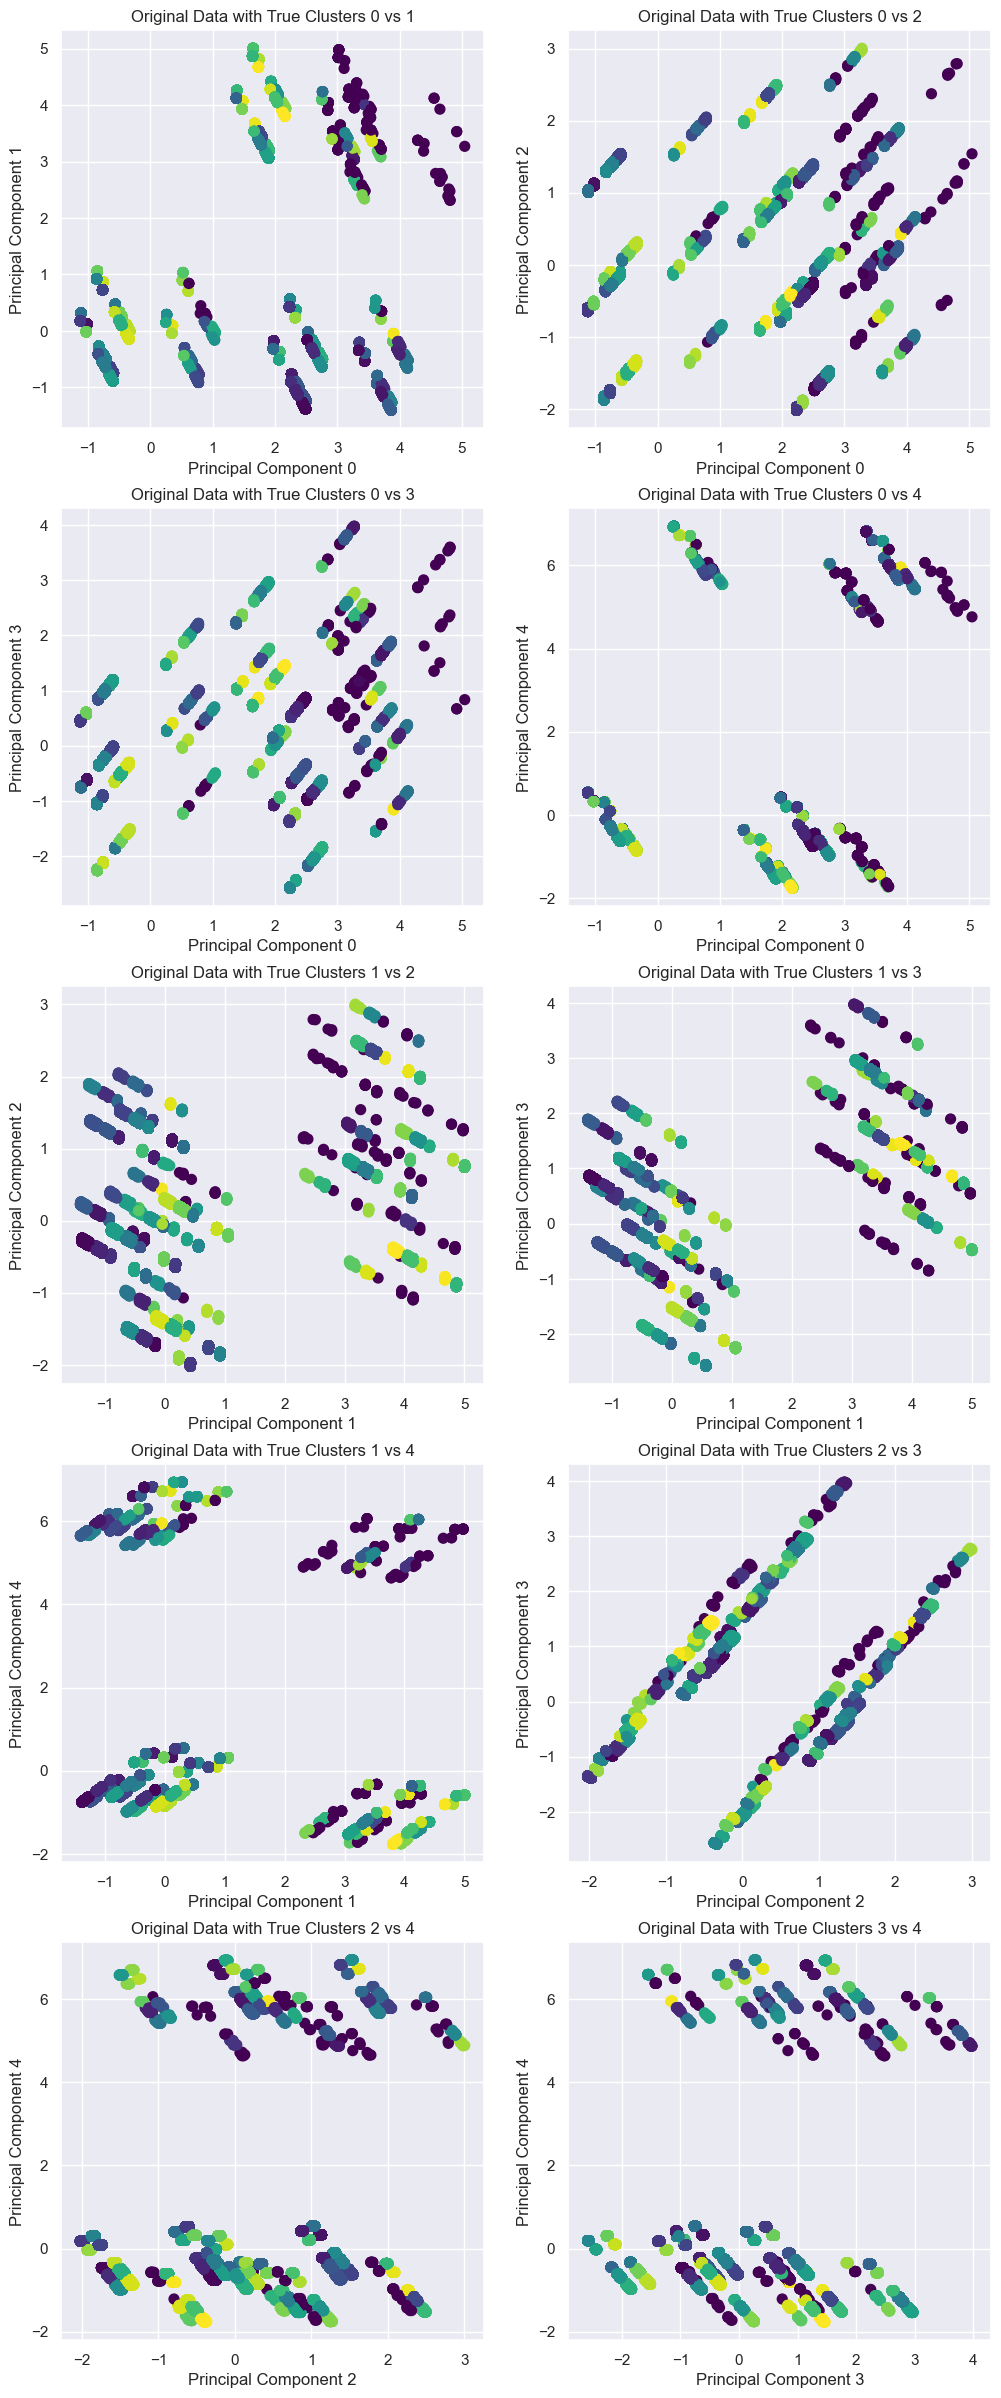

In [107]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
y_dbscan = dbscan.fit_predict(df2)

print((y_dbscan != -1).sum())

plt.figure(figsize=(12, 30))

plots_components = [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2),
                    (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

for i, (x, y) in enumerate(plots_components):
    plt.subplot(5, 2, i+1)
    plt.scatter(X_pca[:, x], X_pca[:, y], c=y_dbscan,
                cmap='viridis', s=50)
    plt.title(f'Original Data with True Clusters {x} vs {y}')
    plt.xlabel(f'Principal Component {x}')
    plt.ylabel(f'Principal Component {y}')